### Clustering 

Clustering is a powerful technique for grouping similar data points together. I Have performed three common clustering methods—K-Means, Agglomerative Clustering, and DBSCAN—using the given dataset “bestsellers with categories.csv”.

In [1]:
import pandas as pd

# Load the dataset
file_path = "bestsellers with categories.csv"
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


### K-Means Clustering:

#### Method Explanation:

   - K-Means aims to partition data into K clusters, where each data point belongs to the cluster with the          nearest mean (centroid).

   - It iteratively assigns data points to the nearest centroid and updates the centroids.

#### Analysis:

   - We’ll visualize the clusters using Principal Component Analysis (PCA) to reduce dimensions.

#### Interpretation of clusters:

   - Observe the distribution of features (User Rating, Reviews, Price) within each cluster.

   - Compare centroids to understand the characteristics of each cluster.

#### Choosing the Number of Clusters:

   - We’ll use the Silhouette Score to determine the optimal number of clusters.

   - Silhouette Score measures how similar an object is to its own cluster compared to other clusters.

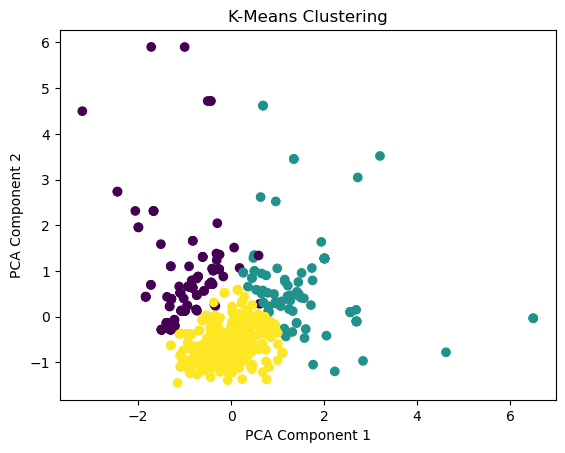

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Select relevant features
X = df[["User Rating", "Reviews", "Price"]]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose K (e.g., 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_scaled)


# Visualize clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap="viridis")
plt.title("K-Means Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


#### Agglomerative Clustering:

#### Method Explanation:

   - Agglomerative Clustering is a hierarchical method that starts with each data point as its own cluster               and merges them iteratively.
    
   - It forms a tree-like structure (dendrogram) and cuts it at a certain height to get clusters.
    
#### Analysis:

   - Similar to K-Means, we’ll visualize clusters using PCA.
    
   - Observe dendrogram to decide the number of clusters.
    
   - Compare cluster characteristics.
    
#### Choosing the Number of Clusters:
 
   - We’ll use the dendrogram to identify a suitable height to cut the tree.

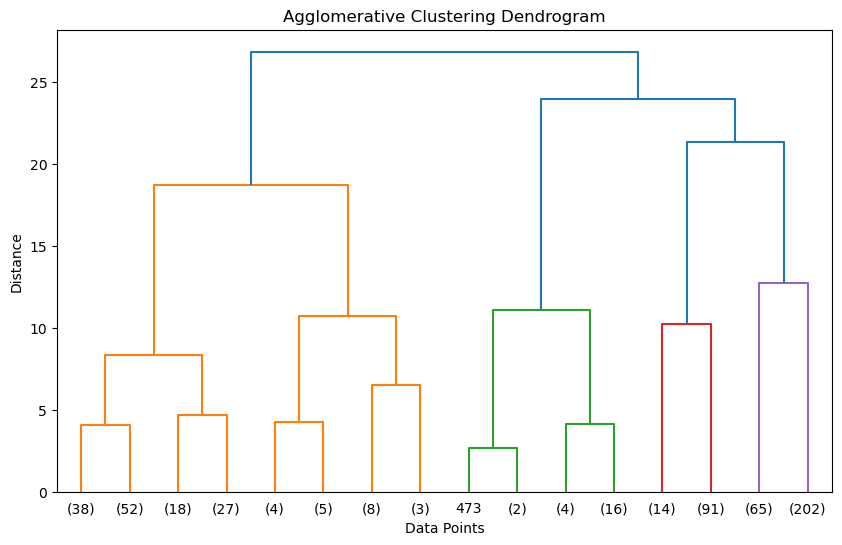

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns

# Create linkage matrix
linkage_matrix = linkage(X_scaled, method="ward")

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode="level", p=3, labels=df.index, leaf_font_size=10)
plt.title("Agglomerative Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


#### DBSCAN (Density-Based Spatial Clustering of Applications with Noise):
    
#### Method Explanation:
    
   -  DBSCAN groups data points based on density.
   
   -  It identifies dense regions separated by sparse areas.
   
   -  Points in sparse areas are considered noise.
   
#### Analysis:

   - Visualize clusters using PCA.
   
   - Observe density of points in each cluster.
   
   - Identify noise points.
   
#### Choosing Parameters:

   - We’ll set the epsilon (eps) and minimum samples parameters.
   
   - Eps defines the radius around each point.
   
   - Min_samples determines the minimum number of points required to form a dense region.

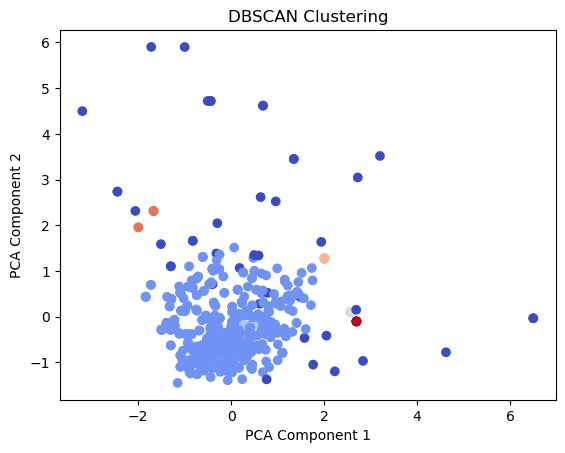

In [6]:
from sklearn.cluster import DBSCAN

# Fit DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_scaled)

# Visualize clusters using PCA
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan.labels_, cmap="coolwarm")
plt.title("DBSCAN Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()
